# Part I - (Loan Data from Prosper Exploration)
## by (Okaome Samson Maduabuchi)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.




## Preliminary Wrangling


In [55]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as px
import statsmodels.api as sm
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [56]:
data=pd.read_csv("prosperLoanData.csv")
data.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [58]:
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [59]:
data.isna().sum().sum()

1364086

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [61]:
data.corr()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.319971,-0.031520,-0.114391,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,...,0.208286,0.104191,-0.251739,-0.247716,-0.096004,0.014688,-0.126031,-0.092813,-0.053481,-0.279659
Term,0.319971,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,...,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.031520,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,...,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,-0.114391,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,...,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,-0.113544,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,...,0.097854,-0.052954,0.099506,0.099195,0.041025,-0.029209,-0.031069,-0.037302,-0.026632,-0.274174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PercentFunded,0.014688,-0.028806,-0.028236,-0.029025,-0.029209,-0.043366,-0.022738,-0.039422,0.012491,-0.019344,...,0.069591,0.006186,-0.013144,-0.013578,0.000776,1.000000,0.009604,0.001622,0.003338,-0.049716
Recommendations,-0.126031,-0.056680,-0.044236,-0.030579,-0.031069,-0.046694,0.004081,-0.019886,0.004772,0.026658,...,-0.039016,-0.015910,0.041372,0.040897,0.016845,0.009604,1.000000,0.718079,0.322062,0.073824
InvestmentFromFriendsCount,-0.092813,-0.043507,-0.046757,-0.037312,-0.037302,-0.063848,0.009475,-0.043022,0.007746,0.028343,...,-0.035004,-0.008319,0.020932,0.020350,0.010109,0.001622,0.718079,1.000000,0.483506,0.058773
InvestmentFromFriendsAmount,-0.053481,-0.024472,-0.031841,-0.026512,-0.026632,-0.038146,0.024555,-0.031902,-0.010459,0.003131,...,-0.056675,-0.010141,0.028762,0.028301,0.018604,0.003338,0.322062,0.483506,1.000000,0.012178


In [62]:
data.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [63]:
# Categorizing all past due loan status as generally past due 
data["LoanStatus"] = data["LoanStatus"].replace(['Past Due (1-15 days)','Past Due (16-30 days)',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)',
       'Past Due (>120 days)'],"Past Due")
data.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

### What is the structure of your dataset?

This dataset contains 113937 loans and 81 features of these loans, most of these features are numerical, with 3 boolean features(qualitative Variables) and 17 objects(qualitative variables) features and a total  1364086 missing entries across all features<br>
 Note: The variable Prosper Risk Score is a ordered factor qualitative variable with levels<br>
       worse(Highest Risk) -----> Best(Lowest RisK)<br>
       1,2,3,4,5,6,7,8,9,10
Also The Loan status is a categorical variable with levels
* Charged off
* Current
* Cancelled
* Past Due 
* Completed
* Final payments In Progress

### What is/are the main feature(s) of interest in your dataset?

I am very much interested in the features that affects The loan status and the features that can help predict the Borrower rate of a loan 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

under appriori grounds i am of the opinion that Borrowers employment status, stated income level and Prosper risk score are factors that can influence the borrowers rate and also these factors should be very strong determinatnts of the Loan status

In [64]:
# Before Exploration let us extract our variables of interest and perform some wrangling on them in order to have quality visuals and better insights
df=data[["BorrowerRate","ProsperScore","LoanStatus","StatedMonthlyIncome","EmploymentStatus"]]
df.head()

,BorrowerRate,ProsperScore,LoanStatus,StatedMonthlyIncome,EmploymentStatus
0,0.1580,NaN,Completed,3083.333333,Self-employed
1,0.0920,7.0,Current,6125.000000,Employed
2,0.2750,NaN,Completed,2083.333333,Not available
3,0.0974,9.0,Current,2875.000000,Employed
4,0.2085,4.0,Current,9583.333333,Employed


In [65]:
df.isna().sum()

BorrowerRate               0
ProsperScore           29084
LoanStatus                 0
StatedMonthlyIncome        0
EmploymentStatus        2255
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   BorrowerRate         113937 non-null  float64
 1   ProsperScore         84853 non-null   float64
 2   LoanStatus           113937 non-null  object 
 3   StatedMonthlyIncome  113937 non-null  float64
 4   EmploymentStatus     111682 non-null  object 
dtypes: float64(3), object(2)
memory usage: 4.3+ MB


In [67]:
def wrangle():
    df_new=df.dropna().reset_index(drop=True)
    return df_new
data = wrangle()
data.isna().sum()

BorrowerRate           0
ProsperScore           0
LoanStatus             0
StatedMonthlyIncome    0
EmploymentStatus       0
dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### what is the status of majority of the loans?

C:\Users\SAMSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


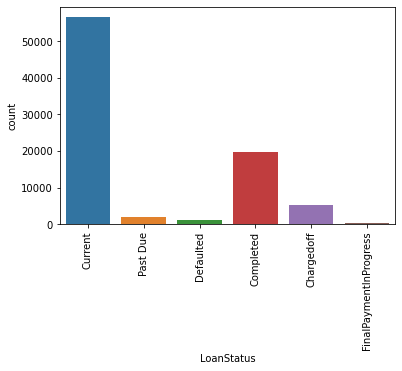

In [68]:
# First Let us see a countplot of the Loan status
def loan_status_count():
    sb.countplot(data.LoanStatus)
    plt.xticks(rotation=90)
loan_status_count()

From the above diagram it appears that majority of the loans are current in status , also more loans appears to be completed and very few loans are cancelled.

### Are majority of the Loans at Higher or Lower Risk ?

C:\Users\SAMSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


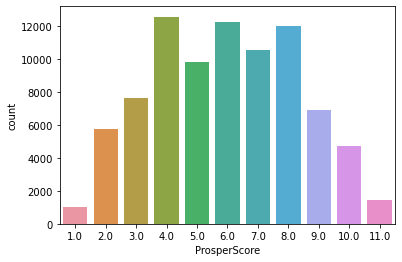

In [69]:
# Lets study the count of the Prosper risk score
def count_risk():
    sb.countplot(data.ProsperScore)
count_risk()


This shows that majority of the Loan have a risk score of 4.0 which appears to be risky based on the scale of the prosper score, But moving down we would notice high counts at prosper score of 6.0,7.0 and 8.0 which indicates less risky loans

### Are there more employed borrowers than unemployed borrowers?

C:\Users\SAMSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Employed'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Full-time'),
  Text(3, 0, 'Self-employed'),
  Text(4, 0, 'Not employed'),
  Text(5, 0, 'Retired'),
  Text(6, 0, 'Part-time')])

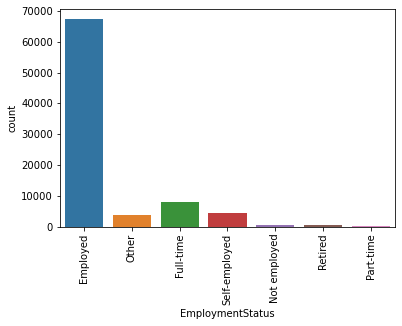

In [70]:
sb.countplot(data.EmploymentStatus)
plt.xticks(rotation=90)

The diagram shows that the data is quite populated with employed individuals compared to unemployed individuals

### Are there Outliers in the numerical variables of interest ?

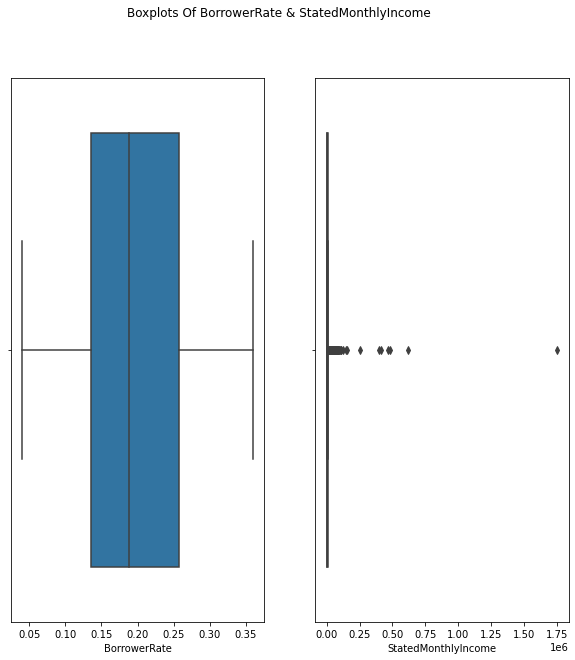

In [71]:
# First Let us Visualize the boxplots of our numerical variables

plt.subplots(figsize=[10,10])
plt.subplot(1,2,1)

sb.boxplot(data=data,x="BorrowerRate")

plt.subplot(1,2,2)
sb.boxplot(data=data, x= "StatedMonthlyIncome")
plt.suptitle("Boxplots Of BorrowerRate & StatedMonthlyIncome ")
plt.show()

Text(0.5, 0.98, 'Distribution Of BorrowerRate')

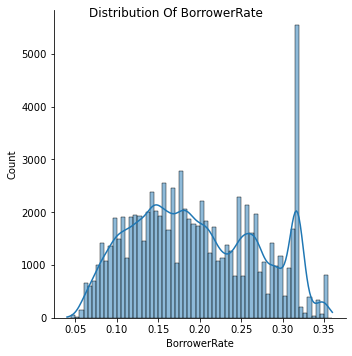

In [72]:
# Let us also visualize the distribution of our numerical variables
bins = np.arange(data.BorrowerRate.min(),data.BorrowerRate.max()+0.005,0.005)
sb.displot(data=data,x="BorrowerRate",bins=bins,kde=True)
plt.suptitle("Distribution Of BorrowerRate")

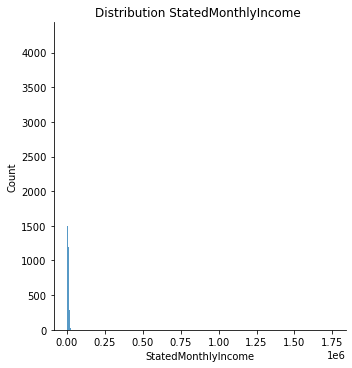

In [73]:

sb.displot(data=data, x= "StatedMonthlyIncome",bins=10000)
plt.title("Distribution StatedMonthlyIncome ")
plt.show()

From the above visuals, we can observe that BorrowerRate contains no outliers shown by the boxplot but the distribution shows that there is a spike in amount of loans at BorrowerRate just above 0.3 and close to 0.32, also from the boxplot of the StatedMonthlyIncome we can observe that this variable contains a lot of outliers as most indivividuals income are centered towards the lower part of the income bracket, judging from the distribution plot, i will attempt of resolve this by changing the scale of this variable after investigating the data points.

In [74]:
data[data.BorrowerRate>0.3]["BorrowerRate"].value_counts()

0.3177    3672
0.3199    1645
0.3500     802
0.3134     726
0.3099     461
          ... 
0.3128       1
0.3014       1
0.3297       1
0.3010       1
0.3427       1
Name: BorrowerRate, Length: 168, dtype: int64

C:\Users\SAMSON\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


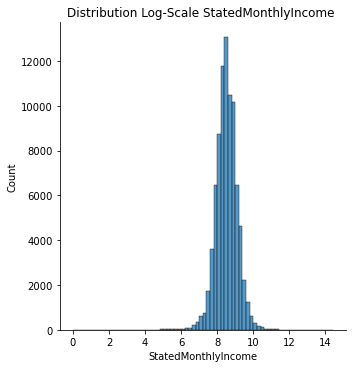

In [75]:
# Visualizing StatedMonthlyIncome on a log-scale
x = np.log(data.StatedMonthlyIncome)
sb.displot(data=data, x= x,bins=np.arange(0,max(x)+0.2,0.2))

plt.title("Distribution Log-Scale StatedMonthlyIncome ")
plt.show()

On a Log Scale, the distributions looks near normal and has a mode between 8 and 10

C:\Users\SAMSON\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


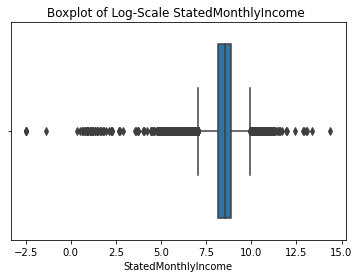

In [76]:
# Checking boxplot for outliers
sb.boxplot(data=data, x= np.log(data.StatedMonthlyIncome))

plt.title("Boxplot of Log-Scale StatedMonthlyIncome ")
plt.show()

In [77]:
data.StatedMonthlyIncome.describe()

count    8.485300e+04
mean     5.931175e+03
std      8.239944e+03
min      0.000000e+00
25%      3.434000e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [78]:
data.StatedMonthlyIncome.value_counts()

4166.666667     2773
5000.000000     2621
3333.333333     2194
5833.333333     1954
5416.666667     1913
                ... 
4417.583333        1
4026.666667        1
8697.750000        1
3314.333333        1
18756.000000       1
Name: StatedMonthlyIncome, Length: 9445, dtype: int64

In [79]:
data[data.StatedMonthlyIncome>100000]

,BorrowerRate,ProsperScore,LoanStatus,StatedMonthlyIncome,EmploymentStatus
6056,0.3199,4.0,Completed,4.166667e+05,Employed
12969,0.3199,5.0,Completed,4.833333e+05,Employed
26245,0.0705,10.0,Completed,1.083333e+05,Full-time
33523,0.2999,2.0,Current,1.500000e+05,Self-employed
39489,0.1795,3.0,Completed,6.185478e+05,Self-employed
39597,0.3177,4.0,Current,1.750003e+06,Self-employed
42555,0.3199,5.0,Current,4.666667e+05,Employed
44147,0.2049,6.0,Current,1.208333e+05,Self-employed
59626,0.1655,6.0,Current,1.583333e+05,Employed
61718,0.2710,3.0,Current,2.500000e+05,Self-employed


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The Stated Monthly Income seem to be on a large scale which affect the visualization of its distribution allowing most data points to be centered below 100,000 income level, hence i did a log transform on this variable and notice that it is near normal with a peak between 8 and 10 log-scaled monthly income 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

upon investigation of the StatedMonthlyIncome, i observered several outliers, but it appears this outliers are not due to any errors but rather are just indications that most loans are collected by low income earners,hence all loans above a particular income level was captured as outliers, hence i left them in my analysis.

also i noticed that Prosper score contains a lot of missing entries and is due to the fact that it was collected for only loans starting from 2015 and above, hence i dropped all data collected below 2015.

## Bivariate Exploration
Let us look at the pair-wise correlation between all numerical variables of interest(we will include ProsperScore)

### Which of the numerical Variables are more correlated

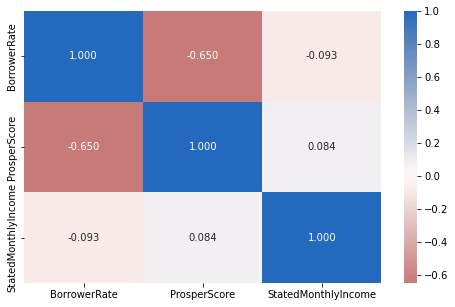

In [80]:
num = data.drop("LoanStatus",axis=1)
plt.figure(figsize = [8, 5])
sb.heatmap(num.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The above shows a weak negative correlation between Monthly income and Borrower rate also a weak Positive correlation between monthly income and Prosper Score, But we can observe a Strong negative correlation between Borrower Rate and Prosper Score

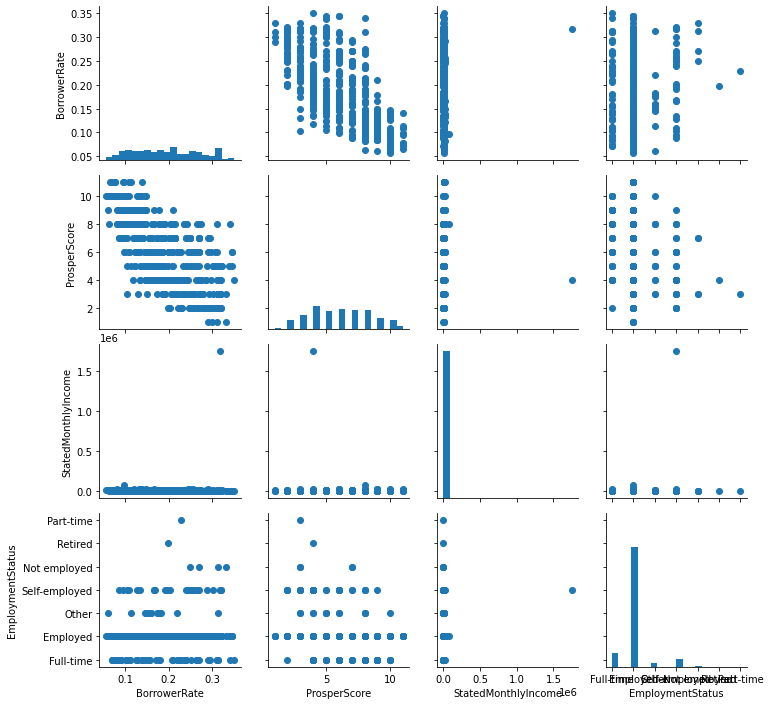

In [81]:
# plot matrix: sample 500 Loans so that plots are clearer and
# they render faster
samples = np.random.choice(data.shape[0], 500, replace = False)
data_samp = data.loc[samples,:]

g = sb.PairGrid(data = data_samp, vars = num)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

we can assertain, judging from the above trends that Borrowers rate and Prosper score are highly negatively correlated.

### Now Let us Properly investigate the relationship between prosper score and Borrowers Rate

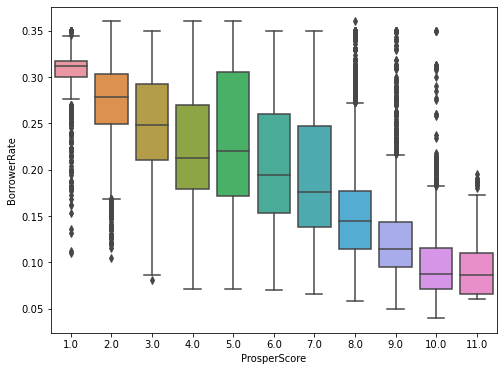

In [82]:
# Box plot of Borrowers rate vs Prosper Score
plt.figure(figsize = [8, 6])
sb.boxplot(data=data,x = "ProsperScore", y = "BorrowerRate")
plt.show()

It is clear from the visuals above that higher Prosper Score(Less Risky Loans) are attributed to Lower Borrower Rate (Loans with Less Returns) and vis ver sar

### What is the relationship between Loan status and prosper risk scores?

C:\Users\SAMSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Current'),
  Text(1, 0, 'Past Due'),
  Text(2, 0, 'Defaulted'),
  Text(3, 0, 'Completed'),
  Text(4, 0, 'Chargedoff'),
  Text(5, 0, 'FinalPaymentInProgress')])

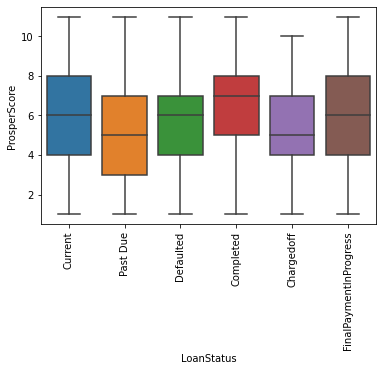

In [83]:
sb.boxplot(data.LoanStatus,data.ProsperScore)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

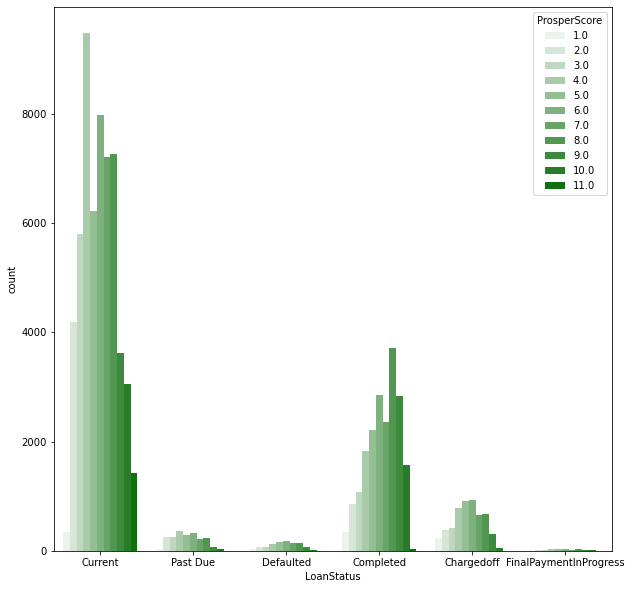

In [84]:
plt.figure(figsize = [10, 10])
sb.countplot(data=data, x="LoanStatus", hue="ProsperScore",color="Green")


The boxplot shows that on an average, current and defaulted loans have a risk score of 6(average risk), while charged off loans on an average have a prosper score of 5 which is a risky indicator, also we can see that most completed loans are actually less risky loans with an average risk score of 7, Looking at the Distribution of the Loans Status using prosper risk score as hue, we can see that the Current loans have more risky loans than less risky loans, but completed loans contains more less risky loans than risky loans, while Charged off loans appears to be bimodal but appears to have more risky loans still.

### Now lets see the relationship between  Loan status and Borrowers employment status

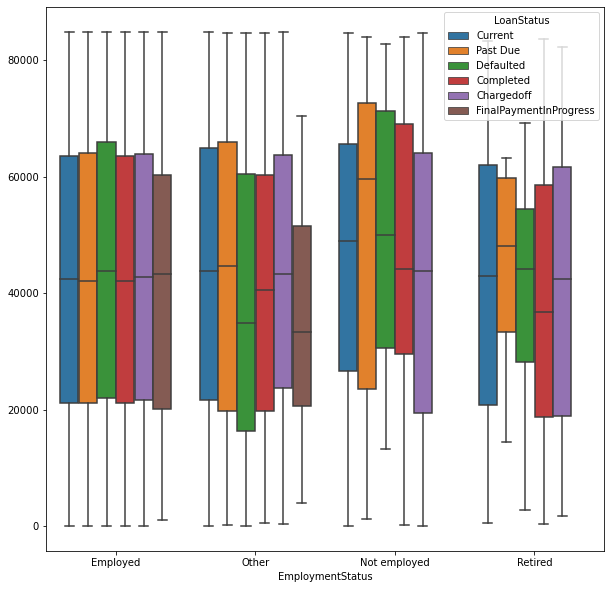

In [85]:
def emp_merge():
    df=data.replace(["Full-time","Self-employed","Part-time"],"Employed")# Making all individuals on partime, full time jobs and self employed all employed
    plt.figure(figsize=([10,10]))
    sb.boxplot(data=df,x="EmploymentStatus",y=df.EmploymentStatus.index,hue="LoanStatus")
emp_merge()

The visual shows that on an average higher counts of Not-employed individuals have past due loans,also they constitute the highest average number of current and defaulted loans while Employed individuals has the highest average count of final payments in progress. 

### Let us observe the relationship between Log Scaled Stated monthly income and Borrowers rate 

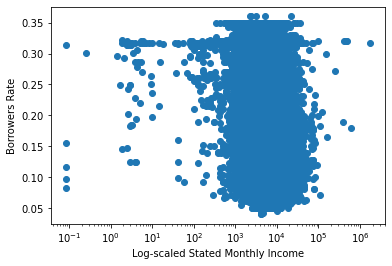

In [86]:
plt.scatter(data.StatedMonthlyIncome,data.BorrowerRate)
plt.xscale("log")
plt.xlabel("Log-scaled Stated Monthly Income")
plt.ylabel("Borrowers Rate")
plt.show()

There appear to be no significant positive or negative relationship between log-scaled Monthly income and Borrowers rate for a loan

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

   From the correlation map i observed that borrowers rate is highly negatively correlated or related with Prosper risk score , but weakly negatively related with Stated monthly income, this shows that mostly risky loans(risk score <6) have have borrowers rate and less risky loans(risk score >6) have low borrowers rate, also i observed that on an average most charged off loans(loans considered as bad debt) where actually considered risky with an average risk score of 5 and also on an average, most completed loans where initially considered less risky. I also observed that unemployed individuals on an average are the major defaulters of loans and they also constitute the major part of the current loans, also it is clear from the visuals that no unemployed or retired individual have any final loan payments in progress with majority of them having their loans as past due.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I observed a negative relationship between employment status status and income level with unemployed individuals have less income level compared to employed individuals.

## Multivariate Exploration
### First let us observe the relationship between borrowers rate, Prosper Score and Employment Status 

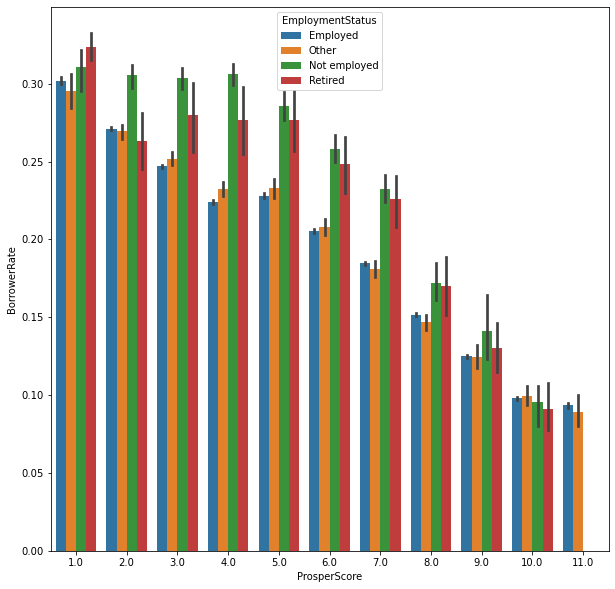

In [87]:
def multi():
    df=data.replace(["Full-time","Self-employed","Part-time"],"Employed")# Making all individuals on partime, full time jobs and self employed all employed
    plt.figure(figsize=([10,10]))
    sb.barplot(data=df,hue="EmploymentStatus", y="BorrowerRate",x="ProsperScore")
multi()

The above shows that highly risky loans collected by Not employed and retired borrowers have the highest levels of borrowers rate and also less risky loans collected by employed individuals constitutes the least borrowers rate.

### Lets see the relationship between the Loan Status , Prosper score and Employment status

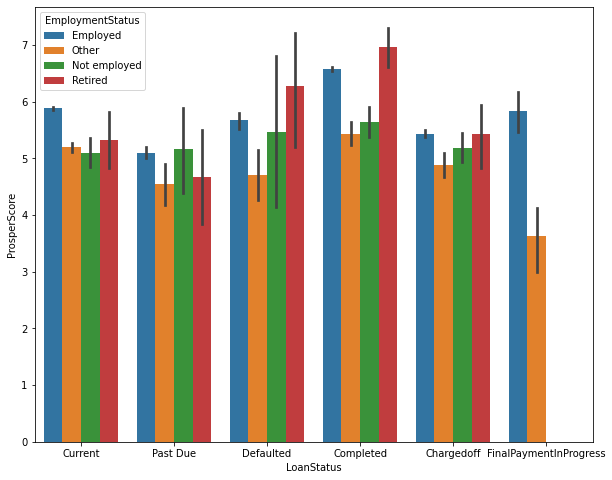

In [88]:
def multi_1():
    df=data.replace(["Full-time","Self-employed","Part-time"],"Employed")# Making all individuals on partime, full time jobs and self employed all employed
    plt.figure(figsize=([10,8]))
    sb.barplot(data=df,hue="EmploymentStatus", x="LoanStatus",y="ProsperScore")
multi_1()

the most risky current,completed and charged off loans are collected by unemployed individuals , disregarding the others category, while the most risky past due loans were collected by employed individuals.

### Lastly, what is the relationship between borrower rate, Stated monthly income and prosper score

Text(0.5, 1.0, 'Borrower Rate across stated monthly income and risk score')

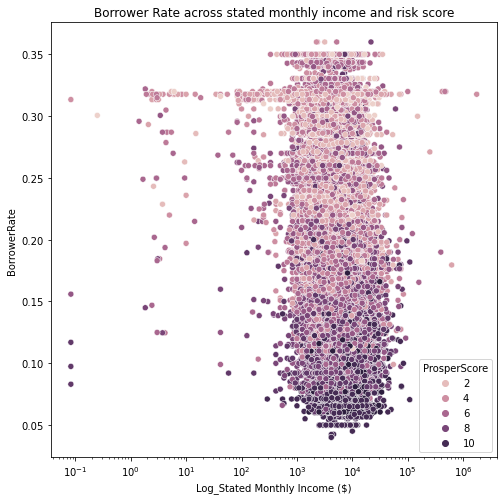

In [89]:
plt.figure(figsize=[8,8])
sb.scatterplot(data=data,x="StatedMonthlyIncome",y="BorrowerRate",hue="ProsperScore")
plt.xscale("log")
plt.xlabel("Log_Stated Monthly Income ($)")
plt.title("Borrower Rate across stated monthly income and risk score")

At high borrowers rate we have quite low prosper score within a stable monthly income, which is an indicator of risky loans for almost all income levels at high borrowers rate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Looking at the relationship between Borrowers rate, employment status and prosper score, i discovered that high borrowers rate are attributed to low prosper scores for majorly unemployed individual and also most defaualted collected by unemployed individuals were initially considered risky loans (they had smaller prosper score)


## Conclusions
with all of the visualizations , we can conclude that the prosper risk score is a major feature in predicting the status and borrowers rate of a loan, where we can expect a more risky loan to have a  higher borrowers rate and end up becoming defaulted or charged off, especially if it was collected by a retired or unemployed person.